# Data Visulaization Project

# <center>COVID-19 Overview<center>

<b>Importing important libraries</b>

In [1]:
from jupyter_dash import JupyterDash

#Dash Core Components
from dash import dcc
from dash import html

from dash.dependencies import Input, Output, State

import plotly.express as px
import pandas as pd
import numpy as np

<b>Reading dataset</b><br>https://tinyurl.com/9pfrsc76

In [2]:
df = pd.read_csv('covid_19_data.csv')
df.head()

SNo ObservationDate Province/State  Country/Region      Last Update  \
0    1      01/22/2020          Anhui  Mainland China  1/22/2020 17:00   
1    2      01/22/2020        Beijing  Mainland China  1/22/2020 17:00   
2    3      01/22/2020      Chongqing  Mainland China  1/22/2020 17:00   
3    4      01/22/2020         Fujian  Mainland China  1/22/2020 17:00   
4    5      01/22/2020          Gansu  Mainland China  1/22/2020 17:00   

   Confirmed  Deaths  Recovered  
0        1.0     0.0        0.0  
1       14.0     0.0        0.0  
2        6.0     0.0        0.0  
3        1.0     0.0        0.0  
4        0.0     0.0        0.0

<b>Column Description</b>

Sno - Serial number
ObservationDate - Date of the observation in MM/DD/YYYY

Province/State - Province or state of the observation (Could be empty when missing)

Country/Region - Country of observation

Last Update - Time in UTC at which the row is updated for the given province or country. (Not standardised and so please clean before using it)

Confirmed - Cumulative number of confirmed cases till that date

Deaths - Cumulative number of of deaths till that date

Recovered - Cumulative number of recovered cases till that date

<b>Preprocessing</b>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [4]:
df['ObservationDate'] = df['ObservationDate'].astype('datetime64')
df['Last Update'] = df['Last Update'].astype('datetime64')
df['Confirmed'] = df['Confirmed'].astype('int64')
df['Deaths'] = df['Deaths'].astype('int64')
df['Recovered'] = df['Recovered'].astype('int64')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Province/State   228329 non-null  object        
 3   Country/Region   306429 non-null  object        
 4   Last Update      306429 non-null  datetime64[ns]
 5   Confirmed        306429 non-null  int64         
 6   Deaths           306429 non-null  int64         
 7   Recovered        306429 non-null  int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 18.7+ MB


In [6]:
df.head()

SNo ObservationDate Province/State  Country/Region         Last Update  \
0    1      2020-01-22          Anhui  Mainland China 2020-01-22 17:00:00   
1    2      2020-01-22        Beijing  Mainland China 2020-01-22 17:00:00   
2    3      2020-01-22      Chongqing  Mainland China 2020-01-22 17:00:00   
3    4      2020-01-22         Fujian  Mainland China 2020-01-22 17:00:00   
4    5      2020-01-22          Gansu  Mainland China 2020-01-22 17:00:00   

   Confirmed  Deaths  Recovered  
0          1       0          0  
1         14       0          0  
2          6       0          0  
3          1       0          0  
4          0       0          0

In [7]:
# Extracting year, month & day from the ObservationDate column so we can use them in the filter
df['obsDate_y'] = df['ObservationDate'].dt.year
df['obsDate_m'] = df['ObservationDate'].dt.month
df['obsDate_d'] = df['ObservationDate'].dt.day
df.head()

SNo ObservationDate Province/State  Country/Region         Last Update  \
0    1      2020-01-22          Anhui  Mainland China 2020-01-22 17:00:00   
1    2      2020-01-22        Beijing  Mainland China 2020-01-22 17:00:00   
2    3      2020-01-22      Chongqing  Mainland China 2020-01-22 17:00:00   
3    4      2020-01-22         Fujian  Mainland China 2020-01-22 17:00:00   
4    5      2020-01-22          Gansu  Mainland China 2020-01-22 17:00:00   

   Confirmed  Deaths  Recovered  obsDate_y  obsDate_m  obsDate_d  
0          1       0          0       2020          1         22  
1         14       0          0       2020          1         22  
2          6       0          0       2020          1         22  
3          1       0          0       2020          1         22  
4          0       0          0       2020          1         22

In [8]:
df_egy = df[(df['Country/Region'] == 'Egypt') ]
df_egy.head()

SNo ObservationDate Province/State Country/Region         Last Update  \
1523  1524      2020-02-14            NaN          Egypt 2020-02-14 23:53:02   
1600  1601      2020-02-15            NaN          Egypt 2020-02-14 23:53:02   
1677  1678      2020-02-16            NaN          Egypt 2020-02-14 23:53:02   
1754  1755      2020-02-17            NaN          Egypt 2020-02-14 23:53:02   
1831  1832      2020-02-18            NaN          Egypt 2020-02-14 23:53:02   

      Confirmed  Deaths  Recovered  obsDate_y  obsDate_m  obsDate_d  
1523          1       0          0       2020          2         14  
1600          1       0          0       2020          2         15  
1677          1       0          0       2020          2         16  
1754          1       0          0       2020          2         17  
1831          1       0          0       2020          2         18

In [9]:
# we don't have information about Province/State in some countries, replace the empty value with the same country name
for country in df['Country/Region'].unique():
    df.loc[(df['Country/Region'] == country) & (df['Province/State'].isna()), "Province/State"] = country
    
df.head()

SNo ObservationDate Province/State  Country/Region         Last Update  \
0    1      2020-01-22          Anhui  Mainland China 2020-01-22 17:00:00   
1    2      2020-01-22        Beijing  Mainland China 2020-01-22 17:00:00   
2    3      2020-01-22      Chongqing  Mainland China 2020-01-22 17:00:00   
3    4      2020-01-22         Fujian  Mainland China 2020-01-22 17:00:00   
4    5      2020-01-22          Gansu  Mainland China 2020-01-22 17:00:00   

   Confirmed  Deaths  Recovered  obsDate_y  obsDate_m  obsDate_d  
0          1       0          0       2020          1         22  
1         14       0          0       2020          1         22  
2          6       0          0       2020          1         22  
3          1       0          0       2020          1         22  
4          0       0          0       2020          1         22

In [10]:
df_egy = df[(df['Country/Region'] == 'Egypt') ]
df_egy.head(30)

SNo ObservationDate Province/State Country/Region         Last Update  \
1523  1524      2020-02-14          Egypt          Egypt 2020-02-14 23:53:02   
1600  1601      2020-02-15          Egypt          Egypt 2020-02-14 23:53:02   
1677  1678      2020-02-16          Egypt          Egypt 2020-02-14 23:53:02   
1754  1755      2020-02-17          Egypt          Egypt 2020-02-14 23:53:02   
1831  1832      2020-02-18          Egypt          Egypt 2020-02-14 23:53:02   
1909  1910      2020-02-19          Egypt          Egypt 2020-02-14 23:53:02   
1987  1988      2020-02-20          Egypt          Egypt 2020-02-14 23:53:02   
2069  2070      2020-02-21          Egypt          Egypt 2020-02-21 18:53:02   
2155  2156      2020-02-22          Egypt          Egypt 2020-02-21 18:53:02   
2241  2242      2020-02-23          Egypt          Egypt 2020-02-21 18:53:02   
2329  2330      2020-02-24          Egypt          Egypt 2020-02-21 18:53:02   
2425  2426      2020-02-25          Egypt          Egypt 2020-02-21 18:53:02   
2528  2529      2020-02-26          Egypt          Egypt 2020-02-21 18:53:02   
2635  2636      2020-02-27          Egypt          Egypt 2020-02-21 18:53:02   
2747  2748      2020-02-28          Egypt          Egypt 2020-02-28 04:13:09   
2865  2866      2020-02-29          Egypt          Egypt 2020-02-28 04:13:09   
2982  2983      2020-03-01          Egypt          Egypt 2020-03-01 23:33:03   
3113  3114      2020-03-02          Egypt          Egypt 2020-03-01 23:33:03   
3256  3257      2020-03-03          Egypt          Egypt 2020-03-01 23:33:03   
3418  3419      2020-03-04          Egypt          Egypt 2020-03-01 23:33:03   
3580  3581      2020-03-05          Egypt          Egypt 2020-03-05 13:53:03   
3732  3733      2020-03-06          Egypt          Egypt 2020-03-06 13:03:13   
3934  3935      2020-03-07          Egypt          Egypt 2020-03-06 13:03:13   
4139  4140      2020-03-08          Egypt          Egypt 2020-03-08 19:03:11   
4396  4397      2020-03-09          Egypt          Egypt 2020-03-09 10:03:17   
4667  4668      2020-03-10          Egypt          Egypt 2020-03-10 05:13:07   
4882  4883      2020-03-11          Egypt          Egypt 2020-03-11 22:13:12   
5100  5101      2020-03-12          Egypt          Egypt 2020-03-12 08:53:02   
5363  5364      2020-03-13          Egypt          Egypt 2020-03-11 20:00:00   
5551  5552      2020-03-14          Egypt          Egypt 2020-03-14 22:33:03   

      Confirmed  Deaths  Recovered  obsDate_y  obsDate_m  obsDate_d  
1523          1       0          0       2020          2         14  
1600          1       0          0       2020          2         15  
1677          1       0          0       2020          2         16  
1754          1       0          0       2020          2         17  
1831          1       0          0       2020          2         18  
1909          1       0          0       2020          2         19  
1987          1       0          0       2020          2         20  
2069          1       0          0       2020          2         21  
2155          1       0          0       2020          2         22  
2241          1       0          0       2020          2         23  
2329          1       0          0       2020          2         24  
2425          1       0          0       2020          2         25  
2528          1       0          0       2020          2         26  
2635          1       0          0       2020          2         27  
2747          1       0          1       2020          2         28  
2865          1       0          1       2020          2         29  
2982          2       0          1       2020          3          1  
3113          2       0          1       2020          3          2  
3256          2       0          1       2020          3          3  
3418          2       0          1       2020          3          4  
3580          3       0          1       2020          3

In [11]:
df_bulgaria = df[(df['Country/Region'] == 'Bulgaria') ]
df_cyprus = df[(df['Country/Region'] == 'Cyprus') ]

In [12]:
# Extract the the last row from each country to be used later in bar chart to avoid cumulative sum
df_egy_temp = df_egy.tail(1)
df_bulgaria_temp = df_bulgaria.tail(1)
df_cyprus_temp = df_cyprus.tail(1)
df_union = df_egy_temp.append([df_bulgaria_temp, df_cyprus_temp])
df_union.head()

SNo ObservationDate Province/State Country/Region  \
305709  305710      2021-05-29          Egypt          Egypt   
305686  305687      2021-05-29       Bulgaria       Bulgaria   
305701  305702      2021-05-29         Cyprus         Cyprus   

               Last Update  Confirmed  Deaths  Recovered  obsDate_y  \
305709 2021-05-30 04:20:55     260659   15001     191475       2021   
305686 2021-05-30 04:20:55     418221   17657     380359       2021   
305701 2021-05-30 04:20:55      72363     360      39061       2021   

        obsDate_m  obsDate_d  
305709          5         29  
305686          5         29  
305701          5         29

In [13]:
df_loop = df_egy.append([df_bulgaria, df_cyprus])
df_filtered_bar = pd.DataFrame({'SNo':[], 'ObservationDate':[], 'Province/State':[], 'Country/Region':[], 'Last Update':[], 'Confirmed':[], 'Deaths':[], 'Recovered':[], 'obsDate_y':[], 'obsDate_m':[], 'obsDate_d':[]})
for country in df_loop['Country/Region'].unique():
    df_temp =  df_loop[(df_loop['Country/Region'] == country) ].tail(1)
    df_filtered_bar = df_filtered_bar.append(df_temp)    

In [14]:
df_filtered_bar.head(10)

SNo ObservationDate Province/State Country/Region  \
305709  305710.0      2021-05-29          Egypt          Egypt   
305686  305687.0      2021-05-29       Bulgaria       Bulgaria   
305701  305702.0      2021-05-29         Cyprus         Cyprus   

               Last Update  Confirmed   Deaths  Recovered  obsDate_y  \
305709 2021-05-30 04:20:55   260659.0  15001.0   191475.0     2021.0   
305686 2021-05-30 04:20:55   418221.0  17657.0   380359.0     2021.0   
305701 2021-05-30 04:20:55    72363.0    360.0    39061.0     2021.0   

        obsDate_m  obsDate_d  
305709        5.0       29.0  
305686        5.0       29.0  
305701        5.0       29.0

In [15]:
px.bar(df_filtered_bar, x='Confirmed', y='Province/State', orientation='h', range_color=[0, df_union['Confirmed'].max()], color='Confirmed', title='Country vs Total Confirmed Cases', labels={'Country/Region':'Country/Region', 'Confirmed':'Confirmed Cases'}, color_continuous_scale=['#bfbfbf', '#333333'])

# px.bar(df_filtered_bar, x='Deaths', y='Province/State', orientation='h', range_color=[0, df_union['Deaths'].max()], color='Deaths', title='Country vs Total Deaths', labels={'Country/Region':'Country/Region', 'Deaths':'Deaths'}, color_continuous_scale=['#1a0500', '#ff3300'])

# px.bar(df_filtered_bar, x='Recovered', y='Province/State', orientation='h', range_color=[0, df_union['Recovered'].max()], color='Recovered', title='Country vs Total Recoveries', labels={'Country/Region':'Country/Region', 'Recovered':'Recoveries'}, color_continuous_scale=['#001a00', '#00b300'])

<b>Styling</b>

In [16]:
######## Styles #######

btn_style = {
  'display': 'inline-block',
  'height': '38px',
  'padding': '0 30px',
  'color': '#f2f2f2',
  'text-align': 'center',
  'font-size': '11px',
  'font-weight': '6000',
  'line-height': '38px',
  'letter-spacing': '.1rem',
  'text-transform': 'uppercase',
  'text-decoration': 'none',
  'white-space': 'nowrap',
  'background-color': 'transparent',
  'border-radius': '4px',
  'border': '1px solid white',
  'cursor': 'pointer',
  'width': 'auto',
  'box-sizing': 'border-box' }

btn_style_1 = {
  'display': 'inline-block',
  'height': '38px',
  'padding': '0 30px',
  'color': '#555',
  'text-align': 'center',
  'font-size': '11px',
  'font-weight': '6000',
  'line-height': '38px',
  'letter-spacing': '.1rem',
  'text-transform': 'uppercase',
  'text-decoration': 'none',
  'white-space': 'nowrap',
  'background-color': 'transparent',
  'border-radius': '4px',
  'border': '1px solid #bbb',
  'cursor': 'pointer',
  'width': 'auto',
  'box-sizing': 'border-box' }

container_grp = {
    'display':'flex', 
    'justify-content':'center', 
    'align-items':'center'
}

pretty_container_confirmed = {
  'border-radius': '5px',
  'background-color': '#F9F9F9DD',   # grey with some transparency last two lowest value (00) to the highest value (FF)
  'margin': '10px',
  'padding': '15px',
  'position': 'relative',
  'box-shadow': '2px 10px 2px #494d49',   # dark grey
  'textAlign':'center',
  'font-family':'helvetica',
  'font-weight':'bolder'
}

pretty_container_confirmed_active = {
  'border-radius': '5px',
  'background-color': '#F9F9F9DD',   # grey with some transparency
  'margin': '10px',
  'padding': '15px',
  'position': 'relative',
  'box-shadow': '2px 10px 2px #000099',   # blue
  'textAlign':'center',
  'font-family':'helvetica',
  'font-weight':'bolder'
}


pretty_container_death = {
  'border-radius': '5px',
  'background-color': '#F9F9F9DD',  # grey with some transparency
  'margin': '10px',
  'padding': '15px',
  'position': 'relative',
  'box-shadow': '2px 10px 2px  #cc2900',   # red
  'textAlign':'center',
  'font-family':'helvetica',
  'font-weight':'bolder'
}

pretty_container_recovered = {
  'border-radius': '5px',
  'background-color': '#F9F9F9DD',   # grey with some transparency
  'margin': '10px',
  'padding': '15px',
  'position': 'relative',
  'box-shadow': '2px 10px 2px #009933',  # green
  'textAlign':'center',
  'font-family':'helvetica',
  'font-weight':'bolder'
}

pretty_container = {
  'border-radius': '5px',
  'background-color': '#F9F9F9DD', # grey with some transparency
  'margin': '10px',
  'padding': '15px',
  'position': 'relative',
  'box-shadow': '2px 10px 2px lightgrey',
  'textAlign':'center',
  'font-family':'helvetica',
  'font-weight':'bolder'
}

pretty_graph_container_cum = {
  'border-radius': '5px',
  'background-color': '#F9F9F9DD',  # grey with some transparency
  'margin': '5px 5px 5px 2px',
  'padding': '2x',
  'position': 'relative',
  'box-shadow': '2px 2px 2px lightgrey', 
  'width': '50'
}

pretty_bar_container = {
  'border-radius': '5px',
  'background-color': 'F9F9F9DD',  # grey with some transparency
  'margin': '5px 2px 5px 5px',
  'padding': '2x',
  'position': 'relative',
  'box-shadow': '2px 2px 2px lightgrey', 
  'width': '45%' 
}

pretty_info_container = {
  'border-radius': '5px',
  'margin': '10px',
  'padding': '15px',
  'position': 'relative',
  'width': '66%'
}

pretty_filter_container = {
  'border-radius': '5px',
  'background-color': '#F9F9F9DD',  # grey with some transparency
  'margin': '20px 50px 50px 50px',
  'padding': '15px',
  'position': 'relative',
  'box-shadow': '2px 2px 2px lightgrey',
  'font-family':'helvetica',
  'font-weight':'bolder',
  'justify':'center'
}

filter_container_grp_country_year = {
  'border-radius': '5px',
  'margin': '5px',
  'padding': '5px',
  'position': 'relative',
  'textAlign':'center'
}

txt_page_divider = {
    'textAlign':'center', 
    'color':'White',
    'width':'auto',
    'padding':'30px 0'
}

main_div = {
    'background-image':'url("https://cdn.pixabay.com/photo/2020/03/30/03/20/covid-19-4982910_960_720.jpg")',
    'background-repeat':'no-repeat',
    'background-attachment':'fixed',
    'background-size':'100% 100%',
    'margin':'0px',
    'padding':'0px'
}


<b>Creating the app and the design</b>

In [17]:
# Create Dashboard instance
app = JupyterDash()
app.title = 'COVID-19 Pandemic Overview'

######## HTML ########
app.layout = html.Div(children = [
    
    # Header division
    html.Div([
        html.Div([

        ], style={'width': '20%'}),

        html.Div([
            
            html.Div([
                html.Img(src="https://cdn.pixabay.com/photo/2020/04/29/07/54/coronavirus-5107715_960_720.png", style={'height':'100px', 'width':'100px'}),
            ], style={'width': '10%', 'margin': '30px 5px 10px 0px'}),
            html.Div([
                html.H1('Pandemic Overview', style={'textAlign':'center', 'font-size':'50px', 'color':'white', 'margin': '0px 0px 10px 0px'})    
            ], style={'width': '50%', 'margin': '30px 0px 10px 5px'})
            
        ], style={'width': '60%', 'display':'flex', 'justify-content':'center', 'align-items':'center'}),

        html.Div([
            html.A(html.Button("Learn More",id="DataSet", style=btn_style), href="https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset", target="_blank", className="one-half columns")
        ], style={'width': '20%'})

    ], id="header", style={'display':'flex', 'justify-content':'center', 'align-items':'center', 'margin': '30px 0px 10px 0px'}),
    html.Br(),
    
################# Overview ######################

    # Information division
    html.Div([
        
#         html.Div([
#             html.H1('Pandemic Overview', style={'textAlign':'center', 'font-size':'50px', 'color':'white', 'margin': '0px 0px 10px 0px'})
#         ]),

        html.Div([
            html.Div(
                [
                    html.H4("Total Confirmed Cases"),
                    html.H2(id="total_conf_cases", className="info_text" )
                ], id="tcf_div", style=pretty_container_confirmed),

            html.Div(
                [
                    html.H4("Total Active Cases"),
                    html.H2(id="total_active_cases", className="info_text" ),
                    html.H3(id="total_active_cases_perc", className="info_text")
                ], id="active_div", style=pretty_container_confirmed_active),

            html.Div(
                [
                    html.H4("Total Confirmed Deaths"),
                    html.H2(id="total_conf_deaths", className="info_text"),
                    html.H3(id="total_conf_deaths_perc", className="info_text")
                ], id="tcd", style=pretty_container_death ),

            html.Div(
                [
                    html.H4("Total Confirmed Recoveries"),
                    html.H2(id="total_conf_recovery", className="info_text"),
                    html.H3(id="total_conf_recovery_perc", className="info_text")
                ], id="tcr", style=pretty_container_recovered),

            html.Div(
                [
                    html.H4("Total Countries Infected"),
                    html.H3(id="total_cont_infected", className="info_text" )
                ], id="tci", style=pretty_container),
        
        ], id="quadContainer", style=container_grp)
    
    ], id="infoContainer"),

    
################## Filters ####################
    
    # Filter Division
    html.Div([
        html.Div([
            html.Div(
                [
                    html.P("Country :", style={'width':'20%'}),
                    dcc.Dropdown(
                        id='myDropdown1',
                        options=[
                            {'label':str(country), 'value':str(country)} for country in sorted(df['Country/Region'].unique())
                        ],
                        value=['Angola', 'Cyprus'],
                        multi=True,
                        searchable=False,
                        style={'textAlign':'center', 'width': '100%'}
                    )
                ], id="countryDiv", style=container_grp),

            
            html.Div(
                [
                    html.P("Year :", style={'width':'20%'}),
                    dcc.Dropdown(
                        id='myDropdown2',
                        options=[
                            {'label':str(year), 'value':str(year)} for year in df['obsDate_y'].unique()
                        ],
                        value='2021',
                        searchable=False,
                        style={'textAlign':'center', 'width': '100%'}
                    )
                ], id="yearDiv", style=container_grp),

        ], id="ddlContainer"),

        html.Div(
            [
                html.P("Month :", style={'width':'20%'}),
                html.Div([
                    dcc.Slider(
                    id = 'mySlider',
                    marks={str(month):str(month) for month in df['obsDate_m'].unique()},
                    min= df['obsDate_m'].min(),
                    max= df['obsDate_m'].max(),
                    value=5,
                    step=None
                    )
                ], style = {'width': '100%'})
                
            ], id="monthDiv",style=container_grp),

    ], id="filterContainer", style=pretty_filter_container),

################### Graphs #########################
    html.Br(),
    
    html.Div([
        html.H2("Date vs Confirmed Cases", style = txt_page_divider),
    ], style = {'background-color': '#4d4d4d88'}),
    
    html.Div([
        html.Div([
            dcc.Graph(id = 'linePlot_1', figure={})
        ], id='line_graph_1', style=pretty_graph_container_cum),

        html.Div([
            dcc.Graph(id="bar_1", figure={})
        ], id="bar_div_1", style=pretty_bar_container)
        
    ], id="two_containers_1", style=container_grp),
    html.Br(),
    
    html.Div([
        html.H2("Date vs Deaths", style = txt_page_divider),
    ], style = {'background-color': '#cc290088'}),
    
    html.Div([
        html.Div([
            dcc.Graph(id = 'linePlot_2', figure={})
        ], id='line_graph_2', style=pretty_graph_container_cum),
        
        html.Div([
            dcc.Graph(id="bar_2", figure={})
        ], id="bar_div_2", style=pretty_bar_container)
        
    ], id="two_containers_2", style=container_grp),
    html.Br(),
    
    html.Div([
        html.H2("Date vs Recoveries", style = txt_page_divider),
    ], style = {'background-color': '#00993388'}),
    
    html.Div([
        html.Div([
            dcc.Graph(id = 'linePlot_3', figure={})
        ], id='line_graph_3', style=pretty_graph_container_cum),
        html.Div([
                dcc.Graph(id="bar_3", figure={})
            ], id="bar_div_3", style=pretty_bar_container)

        ], id="two_containers_3", style=container_grp),
    html.Br(),

    html.Div([
        html.H3("Copyright © 2021 Mohamed Hatem & Mohamed Khaled. All rights reserved", style={'textAlign':'center', 'color':'white', 'height':'60px', 'width':'auto', 'margin-bottom':'25px'}),
    ]),
], style=main_div)

###################################################

@app.callback(
    Output(component_id='linePlot_1', component_property='figure'),
    Output(component_id='bar_1', component_property='figure'),
    Output(component_id='linePlot_2', component_property='figure'),
    Output(component_id='bar_2', component_property='figure'),
    Output(component_id='linePlot_3', component_property='figure'),
    Output(component_id='bar_3', component_property='figure'),
    Output(component_id='total_conf_cases', component_property='children'),
    Output(component_id='total_active_cases', component_property='children'),
    Output(component_id='total_active_cases_perc', component_property='children'),
    Output(component_id='total_conf_deaths', component_property='children'),
    Output(component_id='total_conf_deaths_perc', component_property='children'),
    Output(component_id='total_conf_recovery', component_property='children'),
    Output(component_id='total_conf_recovery_perc', component_property='children'),
    Output(component_id='total_cont_infected', component_property='children'),
    Input(component_id='myDropdown1', component_property='value'),
    Input(component_id='myDropdown2', component_property='value'),
    Input(component_id='mySlider', component_property='value')
)

def update_myGraphs(input_cont, input_year, input_month):
    
    # Filter data
    if ((input_cont == '') or (input_year == '') or (input_month == '')):
        df_filtered = df
    else :
        df_filtered = df[(np.isin(df['Country/Region'], input_cont)) & (df['obsDate_y'] <= int(input_year)) & (df['obsDate_m'] <= int(input_month))]
        
    # Extract the the last row from each country to be used later in bar chart to avoid cumulative sum
    df_filtered_bar = pd.DataFrame({'SNo':[], 'ObservationDate':[], 'Province/State':[], 'Country/Region':[], 'Last Update':[], 'Confirmed':[], 'Deaths':[], 'Recovered':[], 'obsDate_y':[], 'obsDate_m':[], 'obsDate_d':[]})
    for country in df_filtered['Country/Region'].unique():
        df_temp =  df_filtered[(df_filtered['Country/Region'] == country) ].tail(1)
        df_filtered_bar = df_filtered_bar.append(df_temp)      
        
    # Display the Date vs Confirmed Cases plot
    fig1 = px.line(df_filtered, x='ObservationDate', y='Confirmed', hover_name='Country/Region', color='Province/State', title='From 1st Case Till Chosen Date', labels={'ObservationDate':'Observation Date', 'Confirmed':'Confirmed Cases'})
    fig1_bar = px.bar(df_filtered_bar, x='Confirmed', y='Province/State', orientation='h', range_color=[0, df_union['Confirmed'].max()], color='Confirmed', title='Country vs Total Confirmed Cases', labels={'Country/Region':'Country/Region', 'Confirmed':'Confirmed Cases'}, color_continuous_scale=['#bfbfbf', '#333333'])
    
    # Display the Date vs Death Cases plot
    fig2 = px.line(df_filtered, x='ObservationDate', y='Deaths', hover_name='Country/Region', color='Province/State', title='From 1st Case Till Chosen Date', labels={'ObservationDate':'Observation Date', 'Deaths':'Deaths'})
    fig2_bar = px.bar(df_filtered_bar, x='Deaths', y='Province/State', orientation='h', range_color=[0, df_union['Deaths'].max()], color='Deaths', title='Country vs Total Deaths', labels={'Country/Region':'Country/Region', 'Deaths':'Deaths'}, color_continuous_scale=['#1a0500', '#ff3300'])
    
    # Display the Date vs Recovered Cases plot
    fig3 = px.line(df_filtered, x='ObservationDate', y='Recovered', hover_name='Country/Region', color='Province/State', title='From 1st Case Till Chosen Date', labels={'ObservationDate':'Observation Date', 'Recovered':'Recoveries'})
    fig3_bar = px.bar(df_filtered_bar, x='Recovered', y='Province/State', orientation='h', range_color=[0, df_union['Recovered'].max()], color='Recovered', title='Country vs Total Recoveries', labels={'Country/Region':'Country/Region', 'Recovered':'Recoveries'}, color_continuous_scale=['#001a00', '#00b300'])
    
  ################# Four Divs #################
    
    conf_cases = []
    conf_deaths = []
    conf_recovery = []
    total_conf_cont_infected = 0
    for country in df_filtered['Country/Region'].unique():
        country_data = df_filtered[df_filtered['Country/Region'] == country]
        
        # Get the total no. of confirmed cases
        max_cases = country_data['Confirmed'].max()
        conf_cases.append(int(max_cases))
        
        # Get the total no. of confirmed deaths
        max_deaths = country_data['Deaths'].max()
        conf_deaths.append(int(max_deaths))
        
        # Get the total no. of confirmed recoveries
        max_recovered = country_data['Recovered'].max()
        conf_recovery.append(int(max_recovered))
        
        # Get the total no. of countries infected
        max_conf_cases = country_data['Confirmed'].max()
        if max_conf_cases > 0:
            total_conf_cont_infected += 1
    
    total_conf_cases = sum(conf_cases)
    
    # Check if there was any confirmed cases
    if total_conf_cases > 0:
        
        total_conf_deaths = sum(conf_deaths)
        total_conf_deaths_perc = total_conf_deaths / total_conf_cases
        total_conf_deaths_perc = str(round(total_conf_deaths_perc, ndigits=2)) + ' %'

        total_conf_recoveries = sum(conf_recovery)
        total_conf_recoveries_perc = total_conf_recoveries / total_conf_cases
        total_conf_recoveries_perc = str(round(total_conf_recoveries_perc, ndigits=2)) + ' %'

        total_active_cases = total_conf_cases - (total_conf_deaths + total_conf_recoveries)
        total_active_cases_perc = total_active_cases / total_conf_cases
        total_active_cases_perc = str(round(total_active_cases_perc, ndigits=2)) + ' %'
        
    else:
        total_conf_cases = 0
        total_active_cases = 0
        total_active_cases_perc = '0 %'
        total_conf_deaths = 0 
        total_conf_deaths_perc = '0 %'
        total_conf_recoveries = 0 
        total_conf_recoveries_perc = '0 %'
        total_conf_cont_infected = 0
         
    ##################################
    
    # Return ouputs
    return fig1, fig1_bar, fig2, fig2_bar, fig3, fig3_bar, total_conf_cases, total_active_cases, total_active_cases_perc, total_conf_deaths, total_conf_deaths_perc, total_conf_recoveries, total_conf_recoveries_perc, total_conf_cont_infected

# app.run_server()
app.run_server(mode='external', host="localhost", port=7788, debug=False)

# app.run_server(debug = True)

 * Running on http://localhost:7788/ (Press CTRL+C to quit)
127.0.0.1 - - [06/Nov/2021 16:19:56] "GET /_alive_65d07d35-37aa-4804-8cf6-bf356648b865 HTTP/1.1" 200 -


Dash app running on http://localhost:7788/


127.0.0.1 - - [06/Nov/2021 16:20:06] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [06/Nov/2021 16:20:07] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [06/Nov/2021 16:20:07] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [06/Nov/2021 16:20:07] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Nov/2021 16:20:07] "GET /_dash-component-suites/dash/dcc/async-slider.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Nov/2021 16:20:07] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Nov/2021 16:20:07] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [06/Nov/2021 16:20:08] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Nov/2021 16:20:31] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Nov/2021 16:20:43] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Nov/2021 16:20:46] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [06/Nov/2021 

<b>Get some insights about your country <br>Stay Safe Stay Home </b>

# <center>Dashboard Screenshots</center>

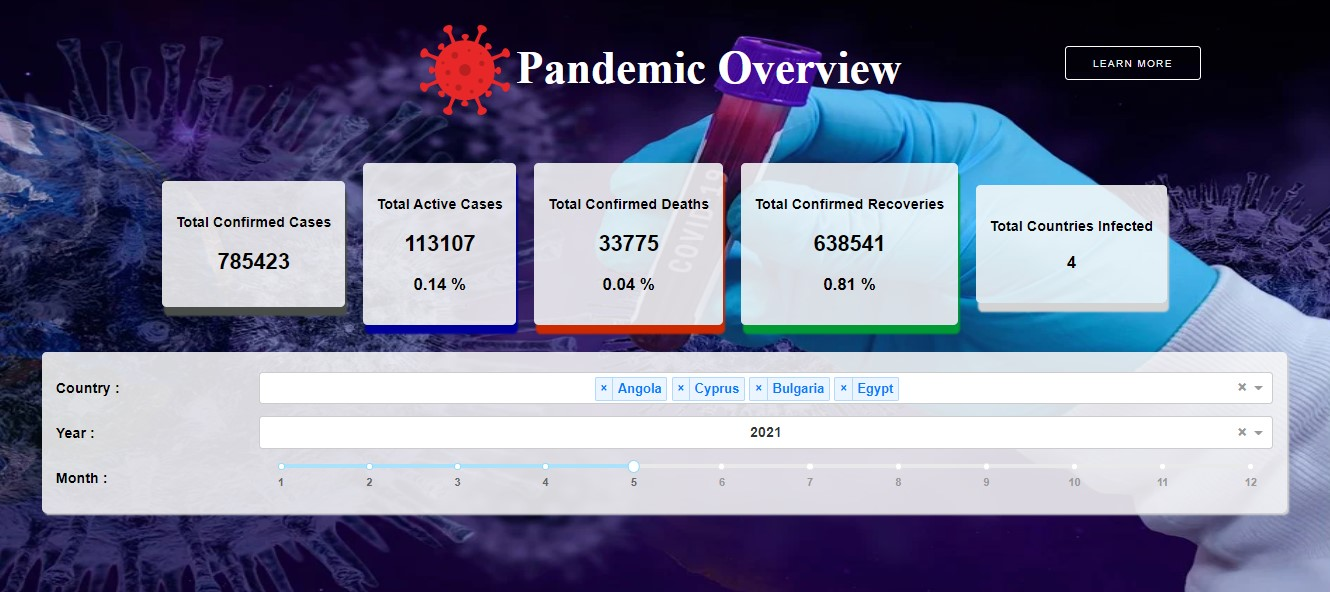

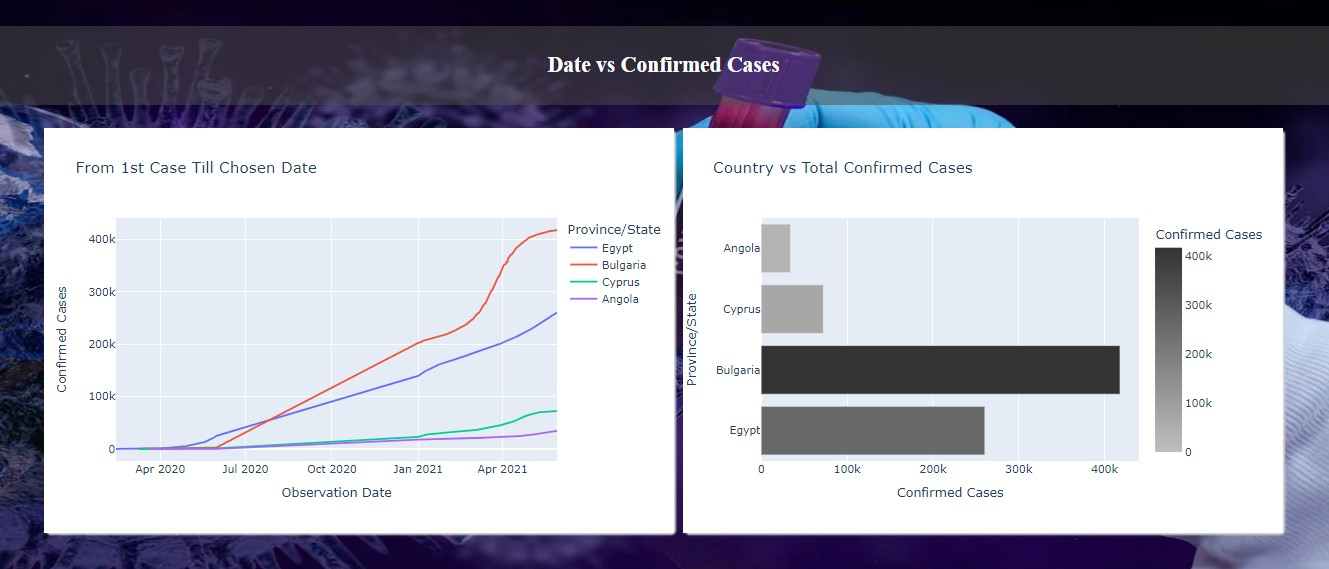

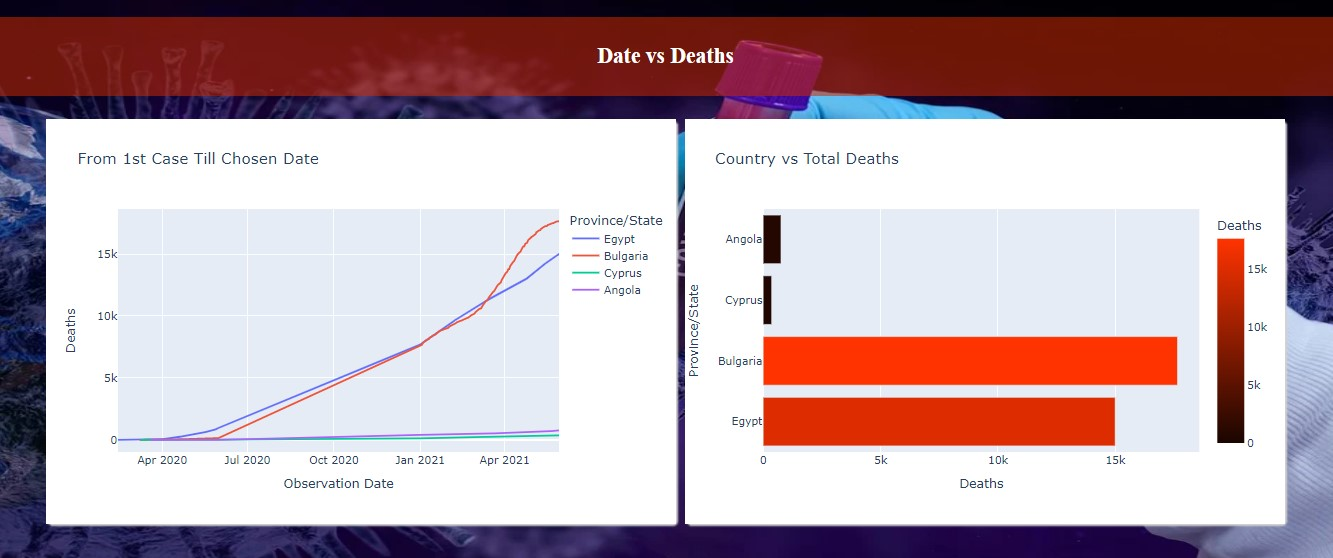

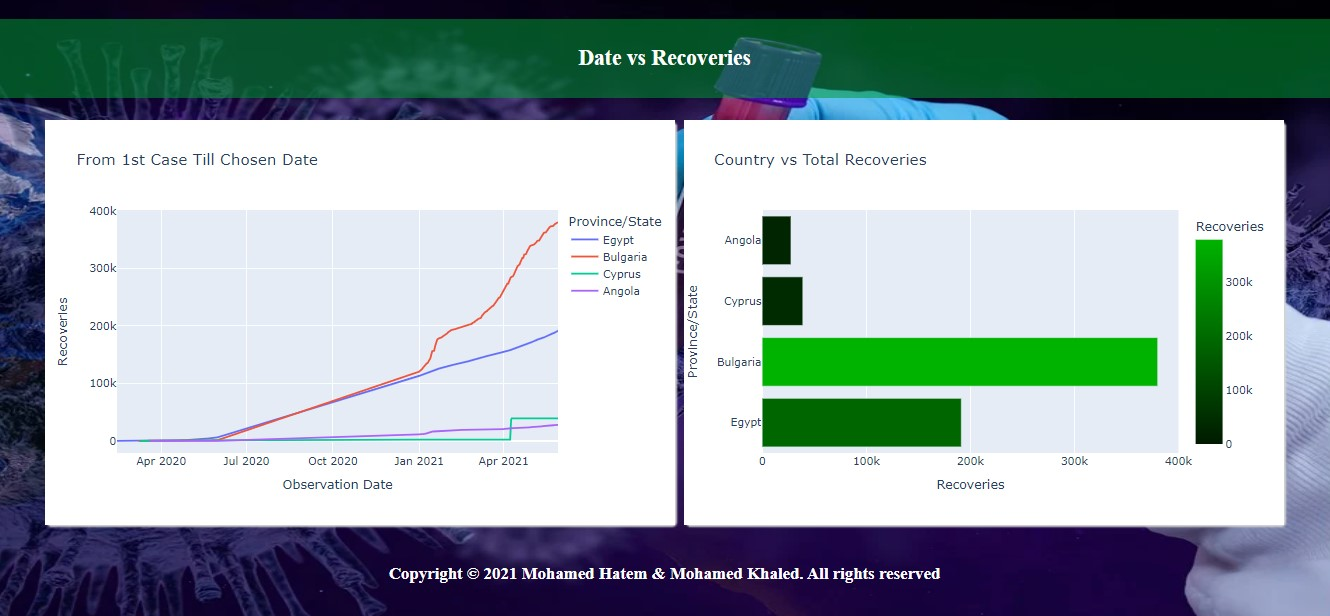